In [1]:
!python -V

Python 3.10.2


In [38]:
import pandas as pd
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [39]:
DATA_DIR = './data'

In [40]:
df = pd.read_parquet(f'{DATA_DIR}/fhv_tripdata_2021-01.parquet')
df.shape

(1154112, 7)

In [41]:
df.head(5)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [42]:
# Avg ride duration in mins
df['duration'] =  df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda dt : dt.total_seconds() / 60)
df.duration.mean()

19.167224093791006

{'whiskers': [<matplotlib.lines.Line2D at 0x13f1c13f0>,
 'caps': [<matplotlib.lines.Line2D at 0x13f1c1a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f1c1240>],
 'medians': [<matplotlib.lines.Line2D at 0x13f1c1f00>],
 'fliers': [<matplotlib.lines.Line2D at 0x158737790>],
 'means': []}

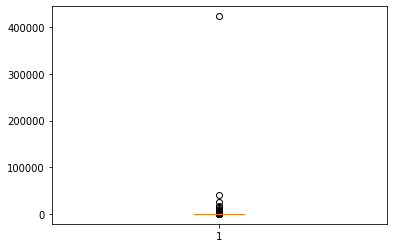

In [43]:

plt.boxplot(df.duration)

In [47]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
df.shape

(1109826, 8)

In [48]:
df.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [49]:
df.isnull().mean() * 100

dispatching_base_num        0.000000
pickup_datetime             0.000000
dropOff_datetime            0.000000
PUlocationID               83.527328
DOlocationID               13.327044
SR_Flag                   100.000000
Affiliated_base_number      0.069651
duration                    0.000000
dtype: float64

In [56]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].fillna(-1).astype('int')
df[categorical] = df[categorical].astype('str')

In [57]:
train_dict = df[['PUlocationID', 'DOlocationID']].to_dict(orient='records')

In [58]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [59]:
X_train.shape


(1109826, 525)

In [60]:
y_train = df.duration.values

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(X_train)

In [63]:
mean_squared_error(y_train, y_pred, squared=False)

10.528519463473573